### Model Building

---

#### 1. Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

#### 2. Loading Data
---

In [2]:
data = pd.read_csv('processed_data.csv')

#### 3. Overview of the Data
---

In [3]:
data.shape

(41352, 16)

In [4]:
data.head(n=5)

,Product Code,Vendor Code,Name,Retail Price,Base Unit,Country,Date Time,Amount,Sale Amount,Discount Amount,Profit/Loss,Percentage Markup,Discount Percentage,Date,Time,Total Sale Amount
0,5028,1 Symbiotica,1 Symbiotica Apple,300.0,Pieces,Russia,2022-07-03 00:00:00,2.0,420.00,180.00,140.00,50.00,30.00,2022-07-03,1900-01-01 00:00:00,5347.71
1,5028,1 Symbiotica,1 Symbiotica Apple,300.0,Pieces,Russia,2022-07-09 13:00:00,4.0,960.00,240.00,400.00,71.43,20.00,2022-07-09,1900-01-01 13:00:00,5347.71
2,5028,1 Symbiotica,1 Symbiotica Apple,300.0,Pieces,Russia,2022-07-19 20:00:00,5.0,1440.00,60.00,740.00,105.71,4.00,2022-07-19,1900-01-01 20:00:00,5347.71
3,4846,1 Symbiotica,1 Symbiotica Hard Kombucha Renegade Aronia,200.0,Pieces,Russia,2022-03-20 17:00:00,4.0,412.23,277.77,52.23,14.51,40.26,2022-03-20,1900-01-01 17:00:00,5347.71
4,4846,1 Symbiotica,1 Symbiotica Hard Kombucha Renegade Aronia,200.0,Pieces,Russia,2022-03-23 17:00:00,2.0,360.00,40.00,180.00,100.00,10.00,2022-03-23,1900-01-01 17:00:00,5347.71


In [5]:
data['Date Time'] = pd.to_datetime(data['Date Time'])

data['Year'] = data['Date Time'].dt.year
data['Month'] = data['Date Time'].dt.month
data['Day'] = data['Date Time'].dt.day

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41352 entries, 0 to 41351
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product Code         41352 non-null  int64         
 1   Vendor Code          41352 non-null  object        
 2   Name                 41352 non-null  object        
 3   Retail Price         41352 non-null  float64       
 4   Base Unit            41352 non-null  object        
 5   Country              41352 non-null  object        
 6   Date Time            41352 non-null  datetime64[ns]
 7   Amount               41352 non-null  float64       
 8   Sale Amount          41352 non-null  float64       
 9   Discount Amount      41352 non-null  float64       
 10  Profit/Loss          41352 non-null  float64       
 11  Percentage Markup    41352 non-null  float64       
 12  Discount Percentage  41352 non-null  float64       
 13  Date                 41352 non-

> Check if the DataFrame contains infinity or NaN in numerical columns
> Replace infinity with NaN in numerical columns

In [7]:
numerical_cols = data.select_dtypes(include=[np.number]).columns

data[numerical_cols] = data[numerical_cols].replace([np.inf, -np.inf], np.nan)

# Filling NaN with mean in numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

#### 4. Data Scaling and Encoding
---

##### 4.1. One Hot Encoding

In [8]:
# scaler = MinMaxScaler()
# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# One-hot encode categorical columns
# data = pd.get_dummies(data, columns=['Name', 'Base Unit', 'Country'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41352 entries, 0 to 41351
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product Code         41352 non-null  int64         
 1   Vendor Code          41352 non-null  object        
 2   Name                 41352 non-null  object        
 3   Retail Price         41352 non-null  float64       
 4   Base Unit            41352 non-null  object        
 5   Country              41352 non-null  object        
 6   Date Time            41352 non-null  datetime64[ns]
 7   Amount               41352 non-null  float64       
 8   Sale Amount          41352 non-null  float64       
 9   Discount Amount      41352 non-null  float64       
 10  Profit/Loss          41352 non-null  float64       
 11  Percentage Markup    41352 non-null  float64       
 12  Discount Percentage  41352 non-null  float64       
 13  Date                 41352 non-

##### 4.2. Label Encoder

In [9]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Transform the "Name" column
data['Name'] = label_encoder.fit_transform(data['Name'])

# Transform the "Base Unit" column
data['Base Unit'] = label_encoder.fit_transform(data['Base Unit'])

# Transform the "Country" column
data['Country'] = label_encoder.fit_transform(data['Country'])


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41352 entries, 0 to 41351
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product Code         41352 non-null  int64         
 1   Vendor Code          41352 non-null  object        
 2   Name                 41352 non-null  int32         
 3   Retail Price         41352 non-null  float64       
 4   Base Unit            41352 non-null  int32         
 5   Country              41352 non-null  int32         
 6   Date Time            41352 non-null  datetime64[ns]
 7   Amount               41352 non-null  float64       
 8   Sale Amount          41352 non-null  float64       
 9   Discount Amount      41352 non-null  float64       
 10  Profit/Loss          41352 non-null  float64       
 11  Percentage Markup    41352 non-null  float64       
 12  Discount Percentage  41352 non-null  float64       
 13  Date                 41352 non-

In [11]:
X = data.drop(columns=['Date Time'])
X = X.select_dtypes(exclude=['object'])

In [12]:
y = data['Total Sale Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (33081, 15)
Testing data shape: (8271, 15)


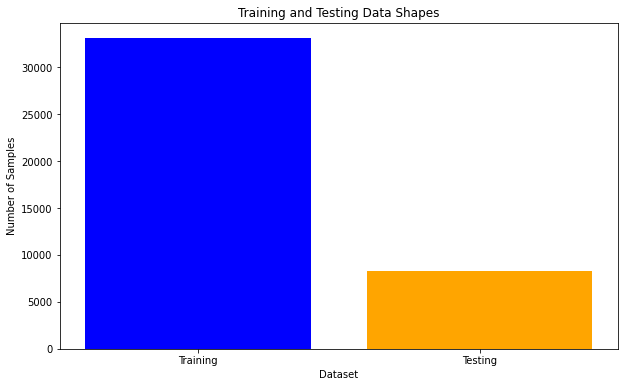

In [13]:
import matplotlib.pyplot as plt

# Assuming you have imported train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and data is your dataset
# X = data[['feature1', 'feature2', ...]] or similar

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Plotting the shapes of the training and testing data
plt.figure(figsize=(10, 6))
plt.bar(["Training", "Testing"], [X_train.shape[0], X_test.shape[0]], color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Training and Testing Data Shapes')
plt.show()


#### 5. Linear Regression
---

In [14]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)


LinearRegression()

In [15]:
# Evaluate the model on the testing data

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error: 6.07650333387682e-10
Mean Squared Error: 5.931099859195003e-19
Root Mean Squared Error: 7.701363424222365e-10
R-squared: 1.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15196\1187679848.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal line')


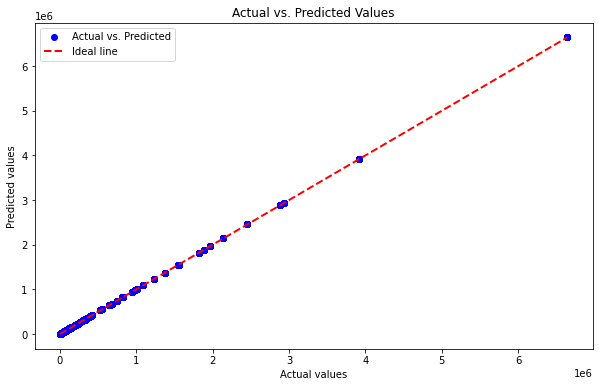

Mean Absolute Error: 6.07650333387682e-10
Mean Squared Error: 5.931099859195003e-19
Root Mean Squared Error: 7.701363424222365e-10
R-squared: 1.0


In [16]:
import matplotlib.pyplot as plt
import numpy as np


# Plotting the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# Displaying evaluation metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)


#### 6. Bagging Models
---

##### 6.1. Random Forest 

In [17]:
# Create an instance of the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=150, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=10, bootstrap=True)

# Perform cross-validation
scores = cross_val_score(rf_regressor, X_train, y_train, cv=5)

print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [0.99999764 0.99999853 0.99999707 0.99999855 0.9999988 ]
Average cross-validation score:  0.9999981188897721


In [18]:
# Fit the regressor to the training data

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=10, n_estimators=150)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Evaluate the model on the testing data
y_pred = rf_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)


print('R-squared:', r2)



R-squared: 0.9999974986137581


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15196\566515339.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal line')


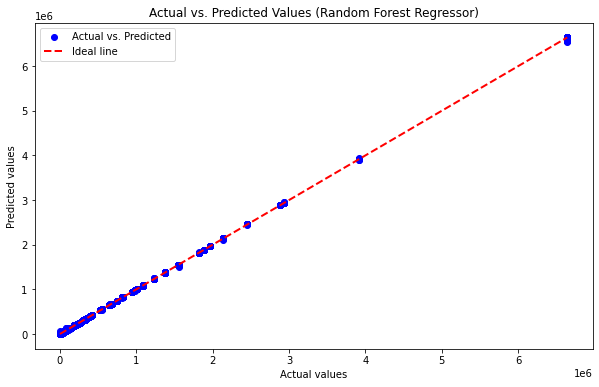

R-squared: 0.9999974986137581
Mean Absolute Error: 1200.2722878689142
Root Mean Squared Error: 3052.920917166575


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have imported necessary libraries and calculated evaluation metrics
# y_pred = rf_regressor.predict(X_test)
# r2 = r2_score(y_test, y_pred)

# Plotting the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.legend()
plt.show()

# Additional evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Displaying evaluation metrics
print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)


#### 7. Boosting Models
---

##### 7.1. XGBRegressor

In [21]:
# Gradient Boosting Regression using XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror',random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [22]:
# Evaluate the model on the testing data

y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print('R-squared:', r2)

R-squared: 0.9999999972243206


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15196\2390487558.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal line')


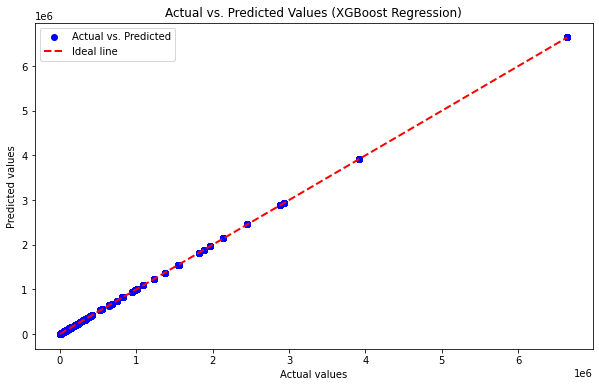

R-squared: 0.9999999972243206


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have imported necessary libraries and calculated evaluation metrics
# y_pred = xgb_model.predict(X_test)
# r2 = r2_score(y_test, y_pred)

# Plotting the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values (XGBoost Regression)')
plt.legend()
plt.show()

# Displaying evaluation metrics
print('R-squared:', r2)


##### 7.2. AdaBoost Regressor

In [24]:
# Gradient Boosting Regression using AdaBoost

from sklearn.tree import DecisionTreeRegressor

bsdt = DecisionTreeRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=10, random_state=42)
adaboost_model = AdaBoostRegressor(bsdt, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                       max_features=10,
                                                       random_state=42),
                  random_state=42)

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extracting one decision tree from the ensemble
tree = adaboost_model.estimators_[0]

# Plotting the decision tree
plt.figure(figsize=(200, 100))
plot_tree(tree, filled=True, feature_names=X_train.columns)
plt.show()


In [26]:
# Evaluate the model on the testing data

y_pred = adaboost_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print('R-squared:', r2)

R-squared: 0.999999949017726


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15196\1365293604.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal line')


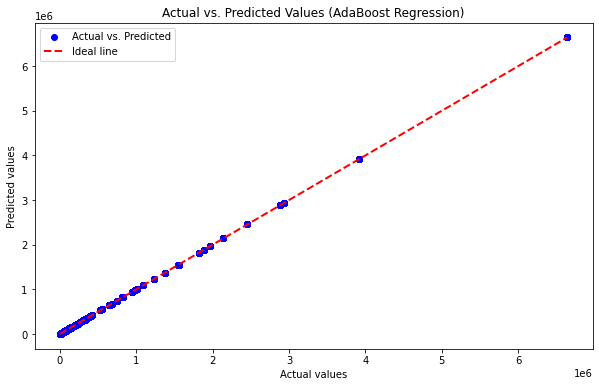

R-squared: 0.999999949017726


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have imported necessary libraries and calculated evaluation metrics
# y_pred = adaboost_model.predict(X_test)
# r2 = r2_score(y_test, y_pred)

# Plotting the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values (AdaBoost Regression)')
plt.legend()
plt.show()

# Displaying evaluation metrics
print('R-squared:', r2)


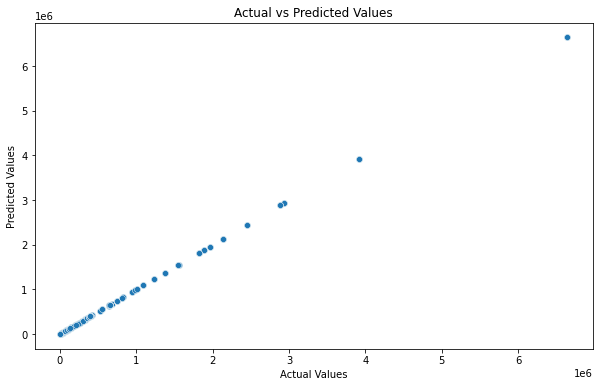

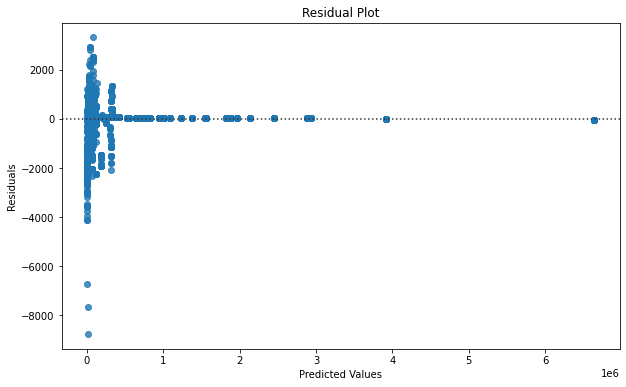

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


#### 8. Model Comparison
---

#### 9. Conclusion

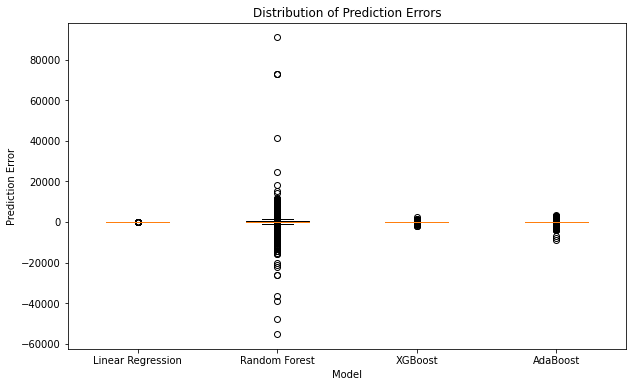

In [29]:
def plot_error_boxplots(error_data, model_names):
    plt.figure(figsize=(10, 6))
    plt.boxplot(error_data, labels=model_names)
    plt.xlabel('Model')
    plt.ylabel('Prediction Error')
    plt.title('Distribution of Prediction Errors')
    plt.show()

# Example usage:
error_data = [y_test - model.predict(X_test) for model in [linear_model, rf_regressor, xgb_model, adaboost_model]]
model_names = ['Linear Regression', 'Random Forest', 'XGBoost', 'AdaBoost']
plot_error_boxplots(error_data, model_names)

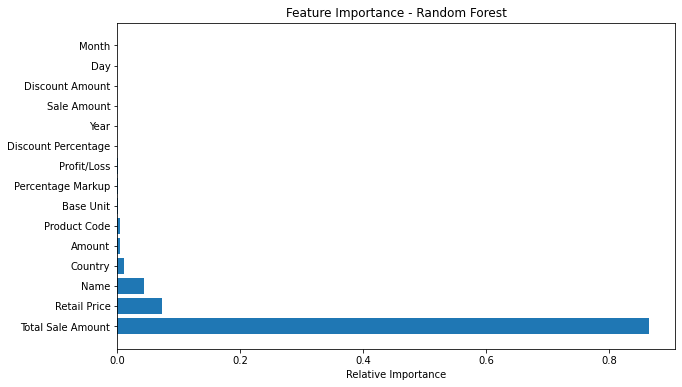

In [30]:
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importance - Random Forest')
    plt.show()

# Example usage:
plot_feature_importance(rf_regressor, X_train.columns)

In [31]:
def display_results_and_predictions(models, model_names, X_test, y_test):
    for model, model_name in zip(models, model_names):
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"Model: {model_name}")
        print(f"  MAE: {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  R²: {r2:.4f}")

        # Displaying top 5 predictions vs actual values
        print("\nTop 5 Predictions vs. Actual:")
        df_results = pd.DataFrame({'Actual': y_test.head(), 'Predicted': y_pred[:5]})
        print(df_results.to_string())
        print("----")

# Example usage (assuming you have trained models and stored predictions)
models = [linear_model, rf_regressor, xgb_model, adaboost_model]
model_names = ['Linear Regression', 'Random Forest', 'XGBoost', 'AdaBoost']
display_results_and_predictions(models, model_names, X_test, y_test)

Model: Linear Regression
  MAE: 0.00
  RMSE: 0.00
  R²: 1.0000

Top 5 Predictions vs. Actual:
           Actual   Predicted
35503   742183.05   742183.05
12402  1542727.60  1542727.60
34107   411986.67   411986.67
34797   557088.20   557088.20
12899  1542727.60  1542727.60
----
Model: Random Forest
  MAE: 1200.27
  RMSE: 3052.92
  R²: 1.0000

Top 5 Predictions vs. Actual:
           Actual     Predicted
35503   742183.05  7.417636e+05
12402  1542727.60  1.542377e+06
34107   411986.67  4.042548e+05
34797   557088.20  5.572985e+05
12899  1542727.60  1.542377e+06
----
Model: XGBoost
  MAE: 32.60
  RMSE: 101.70
  R²: 1.0000

Top 5 Predictions vs. Actual:
           Actual    Predicted
35503   742183.05   742174.125
12402  1542727.60  1542725.250
34107   411986.67   411765.625
34797   557088.20   557115.625
12899  1542727.60  1542721.375
----
Model: AdaBoost
  MAE: 120.94
  RMSE: 435.85
  R²: 1.0000

Top 5 Predictions vs. Actual:
           Actual   Predicted
35503   742183.05   742183.05
1